# ep2 - exploring performance characteristics of simple BDSR on different price patterns

## price patterns of stocks on which BDSR works well and not so well

The following code block loads the pre-defined functions and variables developed in ep1.

In [1]:
import pandas as pd
import datetime
import numpy as np
import time
import matplotlib.pyplot as plt
from my_stock import read_stock, buy_sig, sell_sig, proc_stock, paper_trade_subplot

We load the compilation of the % strategy gain and % benchmark gain generated in studies performed during ep.1.  We then select the stocks from different sectors on which the strategy produced the worst return.

In [2]:
pd.set_option('display.max_rows',600)
df_res = pd.read_csv('SP500_simple_bdsr_res.csv')
df_res.drop(['Unnamed: 0'],axis=1,inplace=True)
ls_stocks = []
for sector,group in df_res.groupby(['GICSSector']):
    res = group.sort_values(by=['Diff Gain %'],ascending=True).iloc[0]
    ls_stocks.append(res)
df_stocks = pd.DataFrame(ls_stocks)
df_stocks

,Symbol,Security,GICSSector,GICS Sub-Industry,Benchmark Gain %,Strategy Gain %,Diff Gain %
332,NFLX,Netflix Inc.,Communication Services,Movies & Entertainment,68.0,12.0,-56.0
175,ETSY,Etsy,Consumer Discretionary,Internet & Direct Marketing Retail,132.0,17.0,-115.0
322,MNST,Monster Beverage,Consumer Staples,Soft Drinks,43.0,7.0,-36.0
60,BKR,Baker Hughes Co,Energy,Oil & Gas Equipment & Services,-12.0,-22.0,-10.0
324,MS,Morgan Stanley,Financials,Investment Banking & Brokerage,44.0,-36.0,-80.0
18,ALGN,Align Technology,Health Care,Health Care Supplies,163.0,41.0,-122.0
88,CARR,Carrier Global,Industrials,Building Products,228.0,19.0,-209.0
348,NVDA,Nvidia Corporation,Information Technology,Semiconductors,192.0,20.0,-172.0
205,FCX,Freeport-McMoRan Inc.,Materials,Copper,121.0,20.0,-101.0
157,DRE,Duke Realty Corp,Real Estate,Industrial REITs,13.0,0.0,-13.0


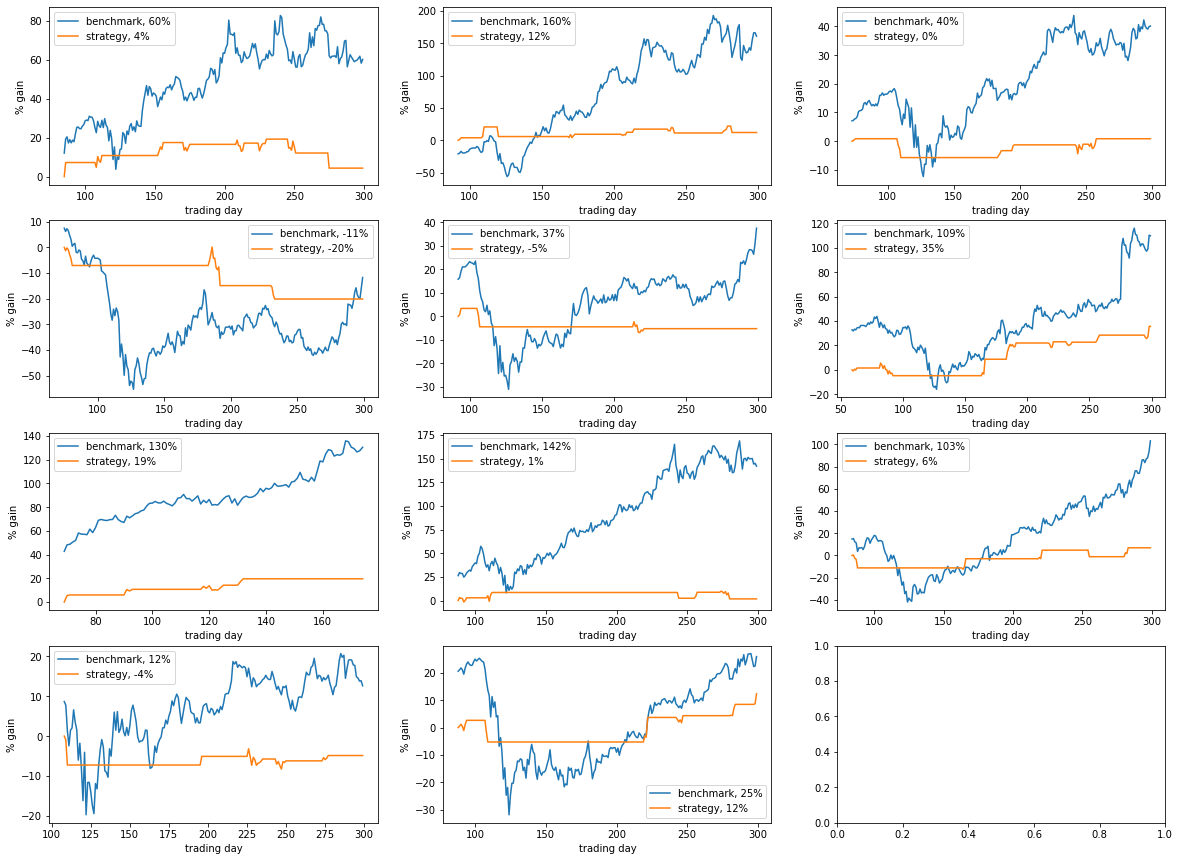

In [3]:
win_MA = 60
win_dip = 10
win_ral = 5

fig,ax=plt.subplots(4,3,figsize=(20,15))
ls_ax = ax.reshape(1,12)[0]

for i in range(0,len(df_stocks)):
    df = read_stock(df_stocks.iloc[i]['Symbol'])
    df = proc_stock(df,win_MA,win_dip,win_ral)
    benchmark_gain,strategy_gain = paper_trade_subplot(df,1000000,5,ls_ax[i])

As can be seen from the above figure, when the price of a stock continuously rises, the strategy often misses the opportunity to buy in and often sells the stock too early.  This performance characteristics appears to be sector-independent while depends on the overal price pattern.  Therefore, we conclude that the price pattern is a more influential factor to the performance of the strategy than the sector.

I would like to know what parameters $n$, $d$ and $r$ would work well for some of the stocks on which the current strategy lacks performances.